# XGBoost with Random Search Cross Validation

Dataset：https://www.kaggle.com/datasets/shrutipandit707/heartdisease

Algorithm: Random Forest

Hyperparameter tuning: Grid Search cross validation

==========

Final result:
由於本研究式疾病預測
因此最需要被降低的是【實際上有病但預測為沒有患病者】
相較於隨機森林法該數值下降了
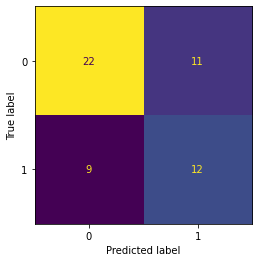

Optimal Hyperparameters:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eta=0.0001, gamma=5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=9.99999975e-05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)
                       
                       
==========             

Note: 
【About XGB with this dataset】
Properly not the best fit


【About Random Search】
Much Faster than grid search!!!

Fitting 5 folds for each of 10 candidates, totalling 50 fits
執行時間：2.096529 秒

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import time

In [47]:
df=pd.read_csv('heart_v2.csv')

In [48]:
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [50]:
y=df['heart disease']
X= df.drop('heart disease',axis=1)

In [51]:
df['heart disease'].value_counts() #balanced dataset

0    150
1    120
Name: heart disease, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(216, 4) (54, 4)
(216,) (54,)


# XGBoost

In [53]:
XGB=XGBClassifier(booster='gbtree', n_estimators=100,max_depth=5)

In [54]:
XGB.fit(X_train, y_train)

[00:45:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\envs\tf37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

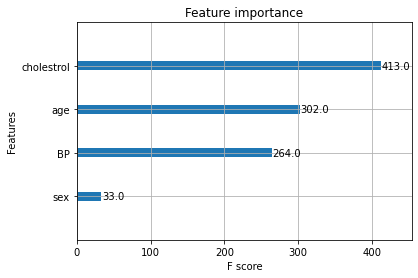

In [55]:
# creates feature importance plot
from xgboost import plot_importance
plot_importance(XGB)

In [56]:
pred=XGB.predict(X_test)

In [57]:
accuracy_score(y_test, pred)

0.6296296296296297

In [58]:
confusion_matrix(y_test, pred)

array([[22, 11],
       [ 9, 12]], dtype=int64)

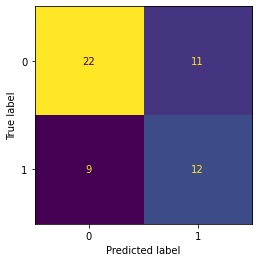

In [59]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(XGB, X_test, y_test, colorbar=False)

# Random Search

In [74]:
params = {
        'eta':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
        'min_child_weight': [1, 5, 10],
        'max_depth':list(range(3,10,2)),
        'gamma': [0.5, 1, 1.5, 2, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 8]
        }

In [75]:
newXGB = XGBClassifier(booster='gbtree', n_estimators=100,nthread=-1)
newXGB=RandomizedSearchCV(estimator = newXGB, 
                                   param_distributions=params, 
                                   scoring='accuracy',cv = 5,
                                   n_jobs = -1,
                                   verbose = 1)

In [76]:
newXGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[00:53:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\envs\tf37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constra...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [77]:
start = time.time()

newXGB_result = newXGB.fit(X_train, y_train)

end = time.time()

# 輸出結果

print("執行時間：%f 秒" % (end - start))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[00:53:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
執行時間：2.096529 秒


C:\anaconda3\envs\tf37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [78]:
y_pred = newXGB_result.predict(X_test)

In [79]:
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.96%


In [82]:
print('\n最佳超參數組合')
print(newXGB.best_estimator_)
print('\n最佳超參數組合')
print(newXGB.best_params_)
print('\n最佳分類器與超參數組合分類結果')
print(newXGB.best_score_)


最佳超參數組合
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eta=0.0001, gamma=5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=9.99999975e-05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

最佳超參數組合
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 5, 'eta': 0.0001, 'colsample_bytree': 0.8}

最佳分類器與超參數組合分類結果
0.7085623678646934


# Optimal XGB

In [91]:
optimalXGB =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eta=0.0001, gamma=5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=9.99999975e-05, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [92]:
optimalXGB .fit(X_train, y_train)

[00:56:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\envs\tf37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eta=0.0001, gamma=5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=9.99999975e-05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [93]:
pred=optimalXGB.predict(X_test)

In [94]:
accuracy_score(y_test, pred)

0.6296296296296297

In [95]:
confusion_matrix(y_test, pred)

array([[22, 11],
       [ 9, 12]], dtype=int64)

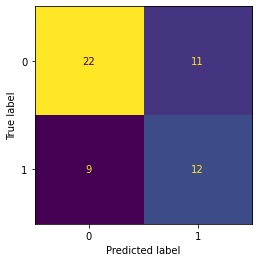

In [96]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(optimalXGB, X_test, y_test, colorbar=False)